<a href="https://colab.research.google.com/github/RidhaAnsar/Dog-Breed-Identification-Using-Tensorflow/blob/main/Dog_Breed_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print("tf version" , tf.__version__)

tf version 2.15.0


In [2]:
import tensorflow_hub as hub
print("tf hub version", hub.__version__)

tf hub version 0.16.1


In [3]:
#check for gpu availability
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


In [4]:
## Getting data ready
# data has to be in numerical format-turning image into numerical form

import pandas as pd
labels_csv=pd.read_csv("drive/My Drive/dog-breed-identification/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())



                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [5]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<Axes: xlabel='breed'>

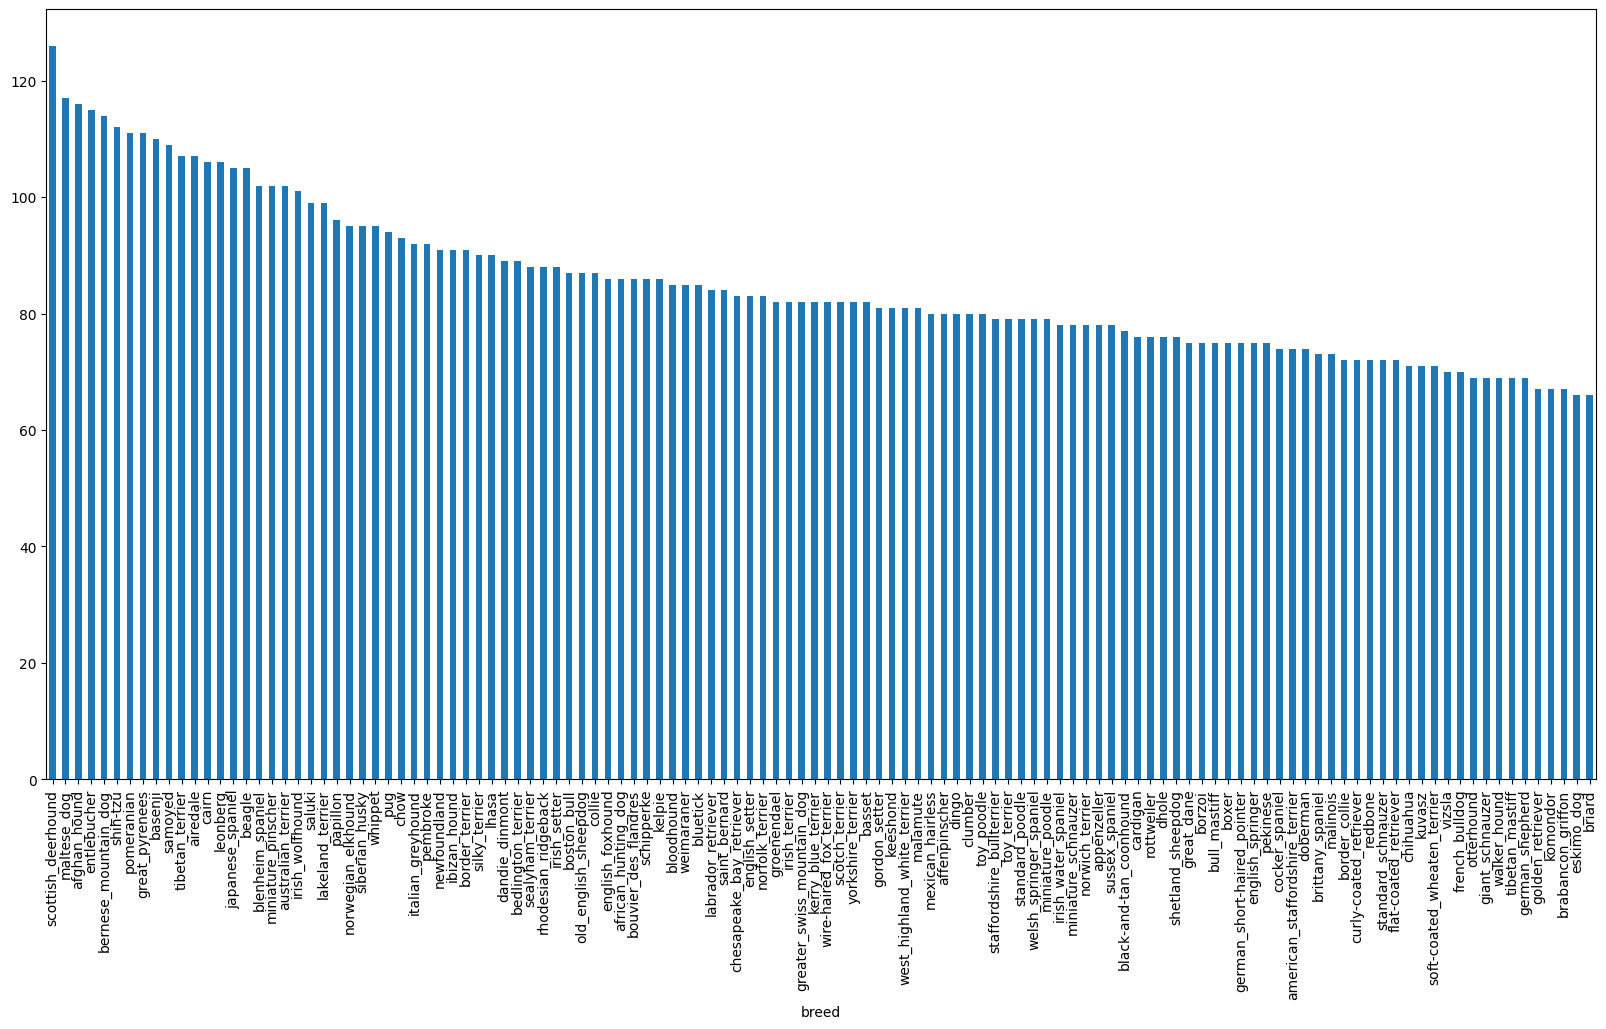

In [6]:
# how many images are there for each breed

labels_csv['breed'].value_counts().plot.bar(figsize=(20,10))

In [7]:
labels_csv["breed"].value_counts().median()

82.0

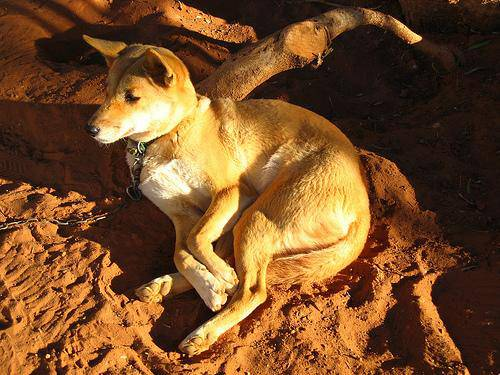

In [11]:
# view an image
from IPython.display import Image
Image("drive/My Drive/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [8]:
# Create pathnames from images IDs
filename=["drive/My Drive/dog-breed-identification/train/" +fname+".jpg" for fname in labels_csv["id"]]
filename


['drive/My Drive/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/My Drive/dog-breed-identification/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/My Drive/dog-breed-identification/t

In [9]:
# chk whther number of filenames matches number of actual image files
import os
if len(os.listdir("drive/My Drive/dog-breed-identification/train/"))==len(filename):
  print("match")
else:
  print("do not match")

do not match


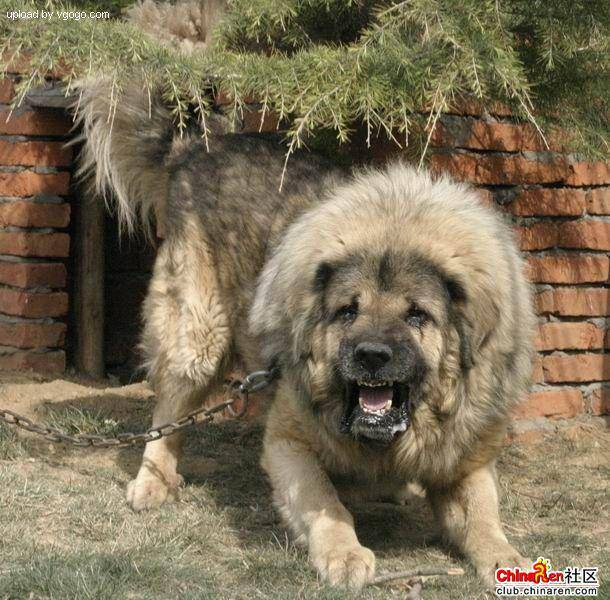

In [12]:
Image(filename[9000])

In [13]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [14]:
# preparing labels
import numpy as np
labels=labels_csv["breed"].to_numpy()
labels


array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [15]:
len(labels)

10222

In [ ]:
len(filename)

10222

In [16]:
# find the unique label values
unique_breeds=np.unique(labels)
len(unique_breeds)

120

In [17]:
print(labels[1])
labels[1]==unique_breeds

dingo


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [18]:
# turn every label into boolean array
boolean_labels=[label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
filename[:10]

['drive/My Drive/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [19]:
# setup x and y variables
x=filename
y=boolean_labels

In [ ]:
len(filename)

10222

In [20]:
# set number of images to use for experimenting
NUM_IMAGES=1000  #@param{type:"slider",min:1000, max:10000,step:100}

In [21]:
# splitting data into train and validation sets

from sklearn.model_selection import train_test_split
#split them into training and validation of total sum num_images
x_train, x_val, y_train, y_val=train_test_split(x[:NUM_IMAGES],
                                                y[:NUM_IMAGES],
                                                test_size=0.2,
                                                random_state=42)
len(x_train), len(x_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [22]:
x_train[:5], y_train[:2]

(['drive/My Drive/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/dog-breed-identification/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fals

In [23]:
## preprocessing images (turning images into tensors)

#convert image into numpy array

from matplotlib.pyplot import imread
image=imread(filename[42])
image.shape

(257, 350, 3)

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]], dtype=uint8)
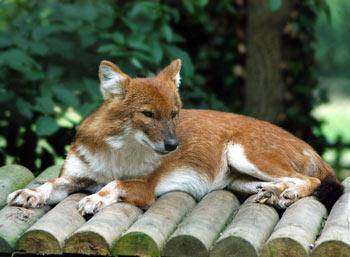

In [ ]:
image

In [ ]:
image.max(), image.min()

(255, 0)

**Function to preprocess image**
1. Take an image filepath as input
2. use tensorflow to read the file and save it to a variable
3. turn our image into tensors
4. resize the image to be a shape of 224, 224
5. normalize the image
6. return the modified image

In [24]:
# define the image size

img_size=224

#function for preprocessing images

def process_image(image_path):
  """
  takes an image file path and turns the image into tensors
  """
  ##read in an image file
  image=tf.io.read_file(image_path)

  # turn the jpeg image into numerical tensor with 3 colour channels (red, green, blue)
  image=tf.image.decode_jpeg(image, channels=3)     #channel-different components that make up the image
   #channels=3: Converts the image to an RGB image, with three channels.

  # convert the colour channel values from 0 - 255 to 0 - 1 values
  image=tf.image.convert_image_dtype(image, tf.float32)

  #resize the image to our desired value
  image=tf.image.resize(image, size=[img_size, img_size])

  return image


**Turning data into batches**




In [25]:
# Create a simple function to return a tuple (image, label)

def get_image_label(image_path, label):
  """
  takes an img file path name and associated label,
  process the image and returns a tuple of(image, label).
  """
  image=process_image(image_path)
  return image, label

In [26]:
(process_image(x[42]), y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [27]:
 ## define the batch size 32
 Batch_size=32

 #create a function to turn data into batches
 def create_data_batches(x,y=None, batch_size=Batch_size, valid_data=False, test_data=False):
  """
  create batches of data out of image x and label y pairs
  shuffles if its training data but doesnt shuffle if its validation data
  """
  # if data is test dataset , dont have labels
  if test_data:
    print("creating data batches")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch=data.map(process_image).batch(Batch_size)
    return data_batch
  # if data is valid dataset , dont need to shuffle it
  elif valid_data:
    print("creating validation data batches")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                             tf.constant(y)))
    data_batch = data.map(lambda x, y: get_image_label(x, y)).batch(batch_size)
    return data_batch

  else:
    print("creating training data batches..")
    #turn filepaths and labels into tensors
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                             tf.constant(y)))
    data=data.shuffle(buffer_size=len(x))

    #create (image, label) tuple
    data = data.map(lambda x, y: get_image_label(x, y))


    #turn trsining data into batch
    data_batch=data.batch(Batch_size)
    return data_batch

In [28]:
# create training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

creating training data batches..
creating validation data batches


In [29]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [30]:
import matplotlib.pyplot as plt
import tensorflow as tf  # Import TensorFlow for tf.argmax()

# Assuming unique_breeds is a list of breed names corresponding to label indices
unique_breeds = [...]  # Define your list of unique breeds or labels here

def show_25_images(images, labels):
    """
    Displays a plot of 25 images and their labels from a data batch.
    """
    # Setup the figure
    plt.figure(figsize=(10, 10))

    # Loop through 25 images (for displaying 25 images)
    for i in range(min(len(images), 25)):
        # Create subplots (5 rows, 5 columns)
        ax = plt.subplot(5, 5, i + 1)
        # Display an image
        plt.imshow(images[i])

        # Debug print to inspect labels[i]
        print(f"Label at index {i}: {labels[i]}")

        # Use tf.argmax if labels[i] is a TensorFlow tensor
        index_of_max_value = tf.argmax(labels[i])

        # Convert index_of_max_value to int (if using TensorFlow, it may be necessary)
        index_of_max_value = int(index_of_max_value)

        # Debug print to inspect index_of_max_value
        print(f"Argmax index: {index_of_max_value}")

        try:
            # Add the image label as title
            plt.title(unique_breeds[index_of_max_value])
        except IndexError:
            print(f"IndexError: Index {index_of_max_value} out of range for unique_breeds list.")
            continue  # Skip this iteration if index is out of range

        plt.axis("off")  # Turn off axis

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

# Example usage:
# Assuming train_images and train_labels are already defined and loaded
# show_25_images(train_images, train_labels)


In [ ]:
unique_breeds[y[0].argmax()]

'boston_bull'

Label at index 0: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]
Argmax index: 33
IndexError: Index 33 out of range for unique_breeds list.
Label at index 1: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False

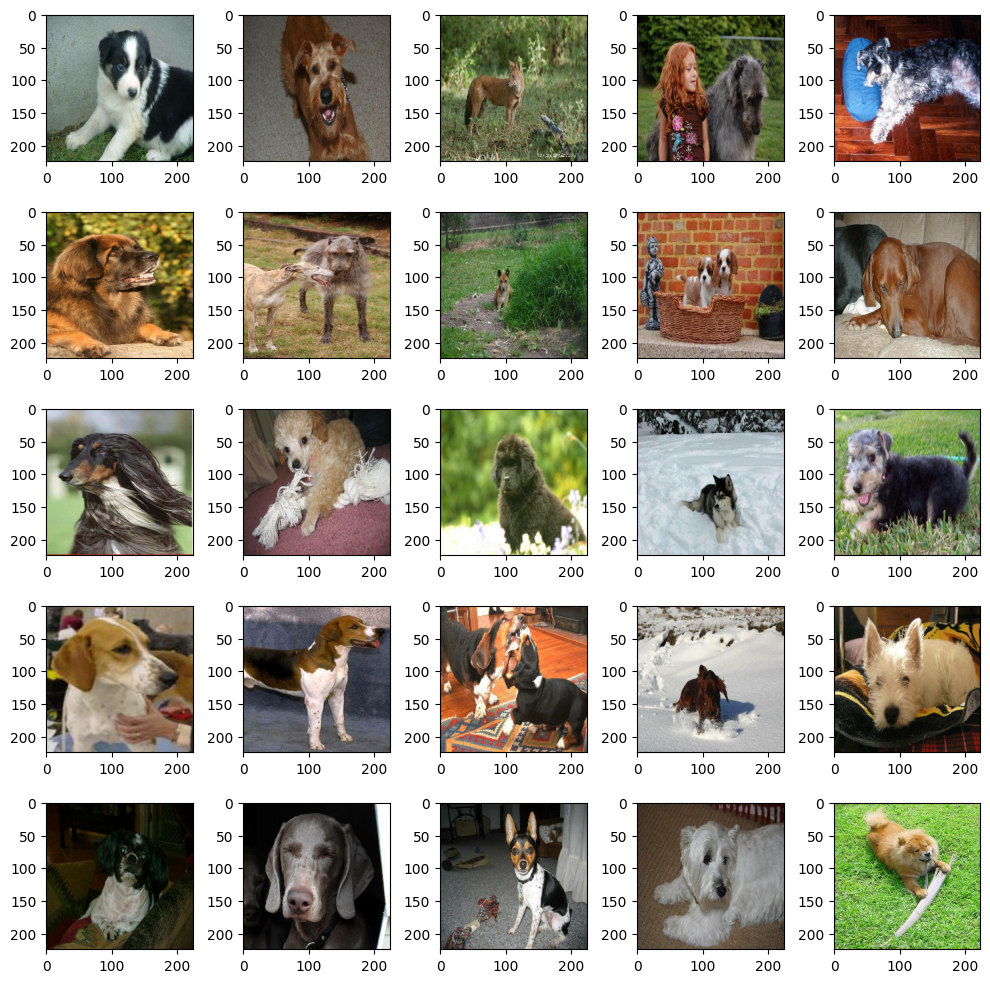

In [31]:
train_images, train_labels=next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

Label at index 0: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]
Argmax index: 33
IndexError: Index 33 out of range for unique_breeds list.
Label at index 1: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False

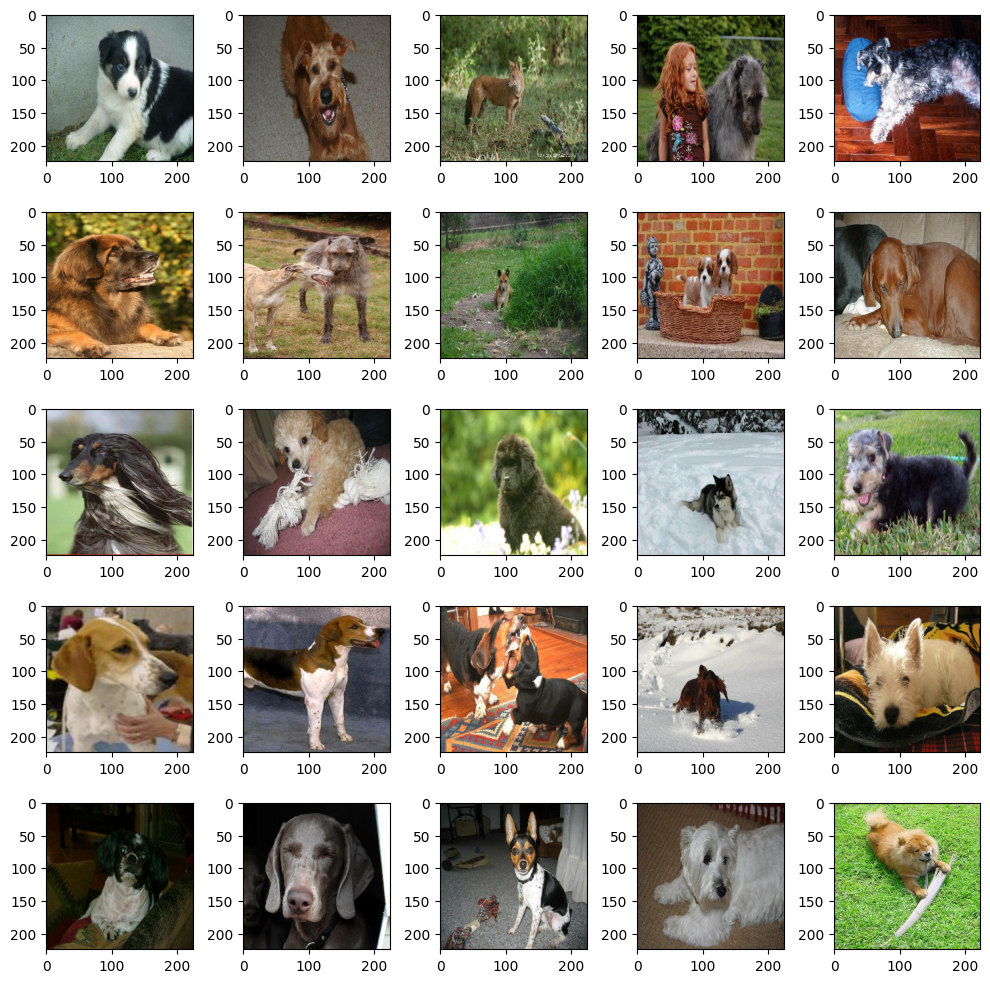

In [32]:
show_25_images(train_images, train_labels);

Label at index 0: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]
Argmax index: 35
IndexError: Index 35 out of range for unique_breeds list.
Label at index 1: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False

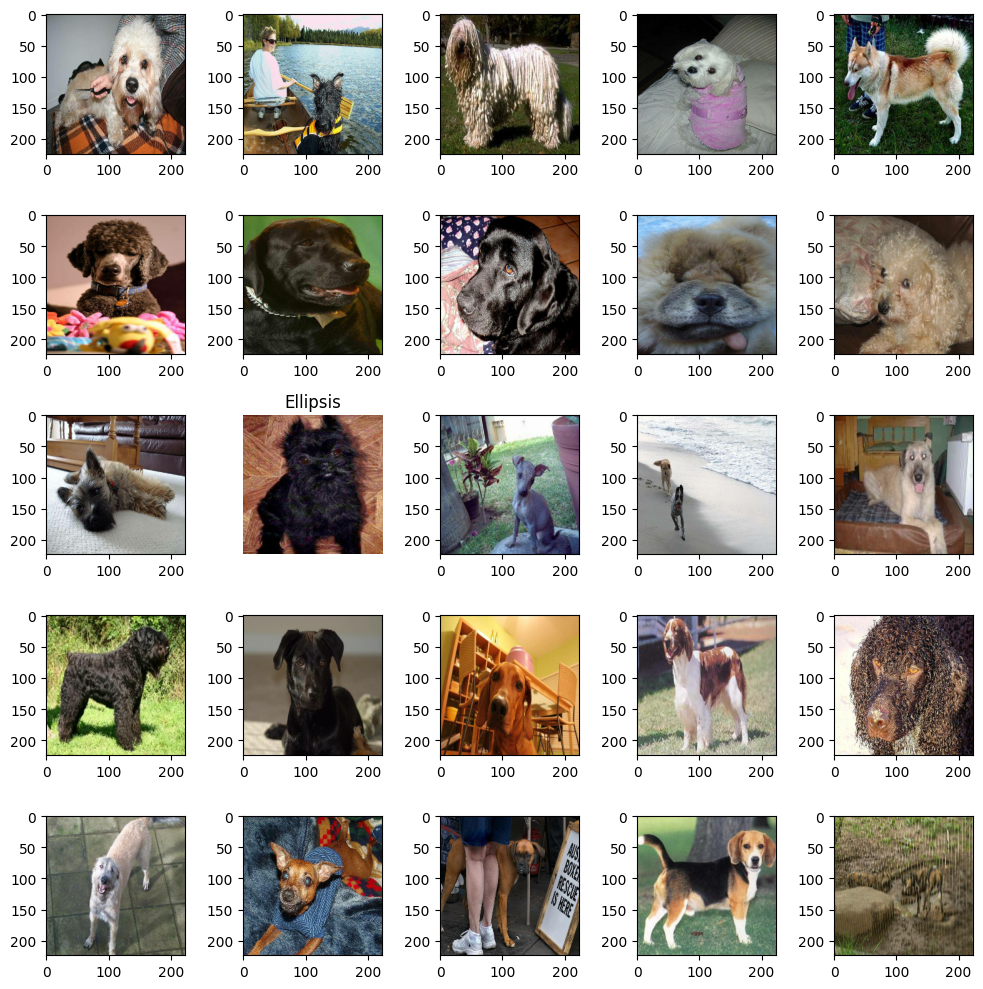

In [ ]:
val_images, val_labels=next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

In [34]:
## Building a model

# setup input shape to the model
INPUT_SHAPE=[None, img_size, img_size,3]
#setup output shape
OUTPUT_SHAPE=len(unique_breeds)

#setup model URL from tensorflowhub
MODEL_URL="https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1"


Inputs, outputs and model ready. lets put them together into a keras deep learning model




**Create a function which**
1. Takes the input shape, output shape and model we've chosen as parameters
2. define layers in keras model in sequential form.
3. compiles the model
4. improve the modle
5. builds the model
5. returns the model


**Keras is a high-level library for deep learning  developed by Google for implementing neural networks. **

In [38]:
# create a function which builds keras model

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, moddel_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # setup the model layers
  model=tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), #layer1-input layer
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax") #layer2(output layer)
  ])

  #compile the model
  model.compile(
  loss=tf.keras.losses.CategoricalCrossentropy(),
  optimizer=tf.keras.optimizers.Adam(),
  metrics=["accuracy"]
  )

  #Build the model
  model.build(INPUT_SHAPE)
  return model

In [39]:
model=create_model()
model.summary()

Building model with: https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 1)                 1002      
                                                                 
Total params: 5433715 (20.73 MB)
Trainable params: 1002 (3.91 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [43]:
outputs=np.ones(shape=(1,1,1280))
outputs

array([[[1., 1., 1., ..., 1., 1., 1.]]])



> **Creating callbacks**
callbacks are helper function a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.




create 2 callbacks, one for TensorBoard which helps  track our model progress and another fro early stopping which prevents our model from training too long

To setup a TensorBoard Callback we need to do 3 things:
1. load the TensorBoard notebook extension
2. create a TensorBoard callback which is able to save logs to a directory and pass it to our models fit() func.
3. visulaize our model training logs with the tensorboard magic function.


In [44]:
# load TensorBoard notebook extension
%load_ext tensorboard

In [45]:
import datetime

#create a func to build a TensorBoard callback
def create_tensorboard_calback():
  # create a log directory for  storing tensorboard logs
  logdir=os.path.join("drive/MyDrive/dog-breed-identification/logs",
                      #make it so the logs get tracked whenver we run as experiment
                      datetime.datetime.noe().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [46]:
#create early stopping callback
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                patience=3)